In [1]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [2]:
!pip install seaborn matplotlib pandas

import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.use("ggplot")
sns.set(rc={'figure.figsize':(10,6)})

In [6]:
df = pd.read_csv("AB_NYC_2019.csv", encoding='latin-1')

In [7]:
print("Dataset.shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Dataset.shape: (48895, 16)
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149            

In [10]:
df.dropna(subset=['price', 'neighbourhood_group','room_type'], inplace=True)
df = df[df['price']<1000]

/tmp/ipython-input-3599161042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['price', 'neighbourhood_group','room_type'], inplace=True)


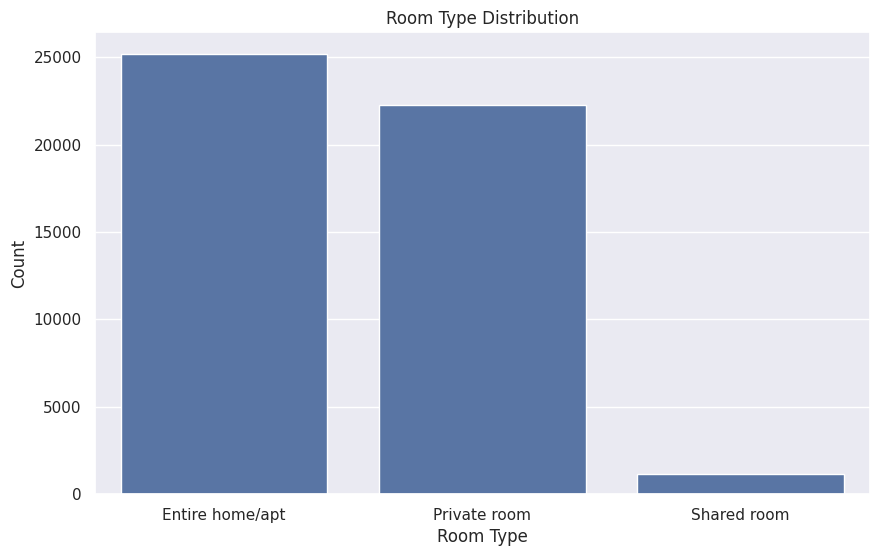

In [11]:
sns.countplot(x="room_type", data=df, order=df['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

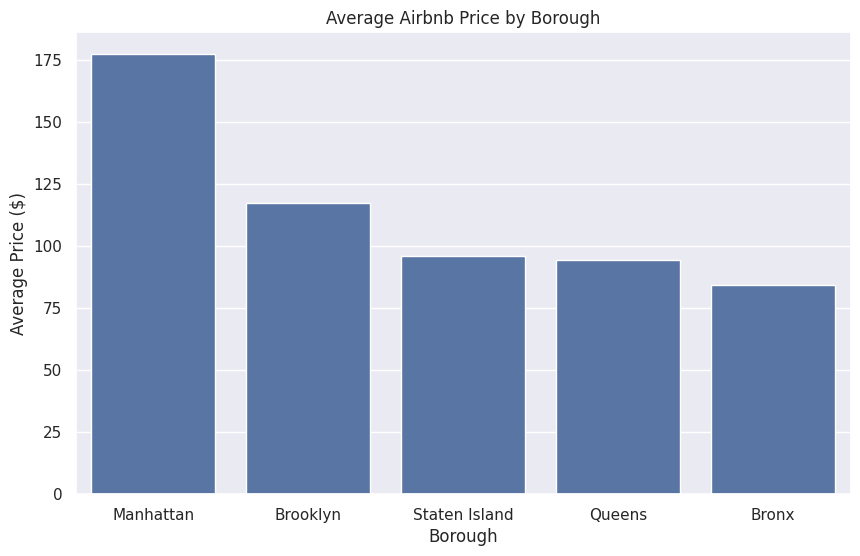

In [12]:
avg_price = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Airbnb Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price ($)")
plt.show()

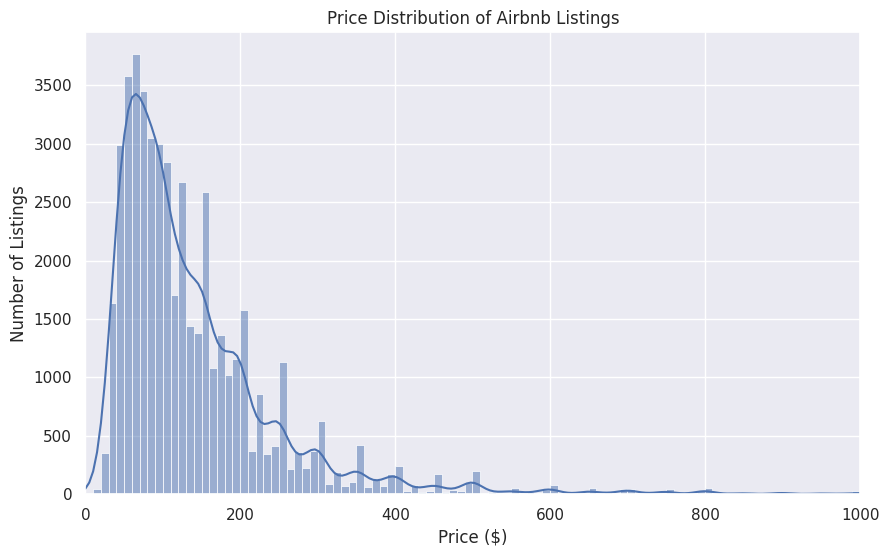

In [13]:
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.show()

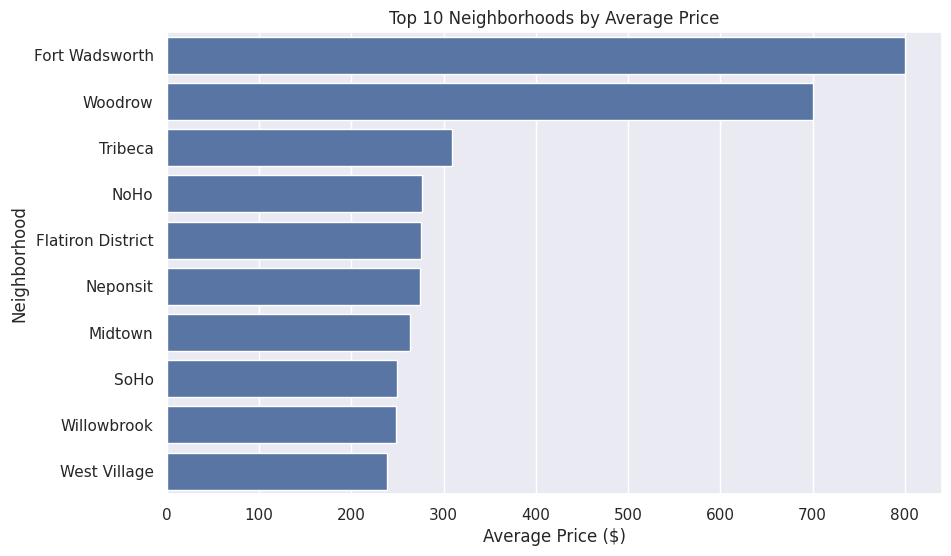

In [14]:
top10 = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Neighborhoods by Average Price")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighborhood")
plt.show()

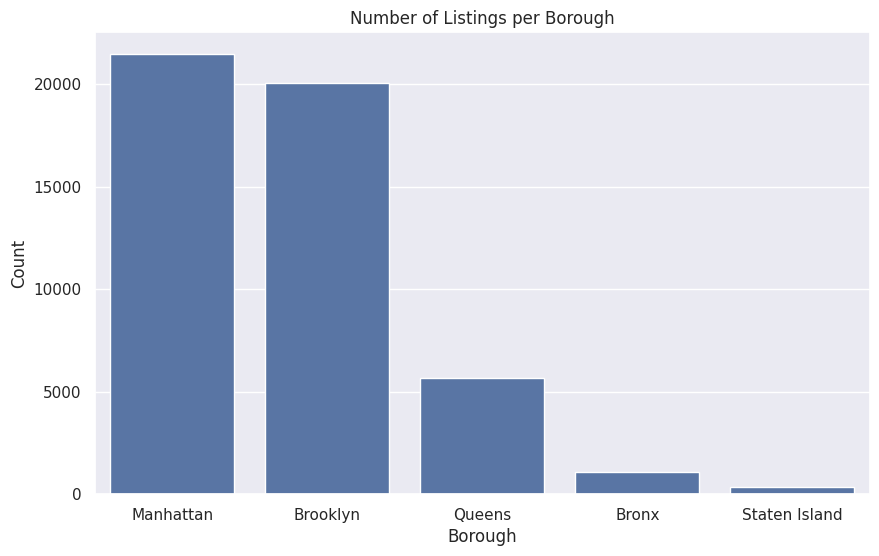

In [15]:
sns.countplot(x="neighbourhood_group", data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings per Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()


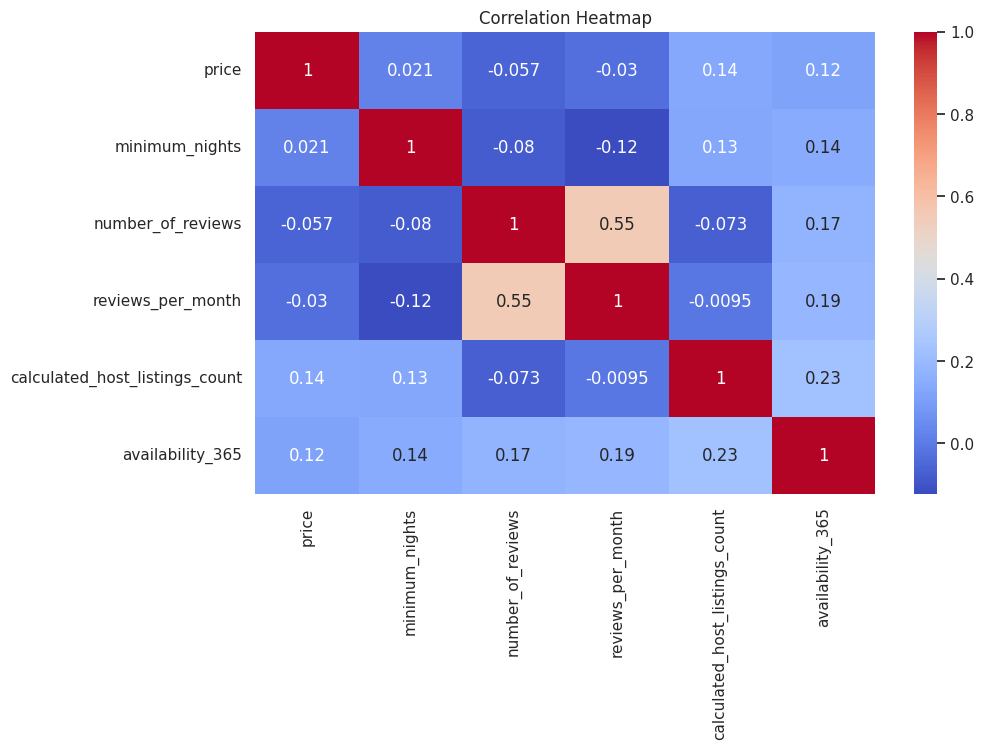

In [16]:
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print("Insights:")
print("- Entire homes/apartments are most expensive, shared rooms cheapest.")
print("- Manhattan has highest average prices, Bronx/Queens are cheaper.")
print("- Most listings are under $300/night.")
print("- Some neighborhoods (Tribeca, Soho) dominate top 10 in pricing.")

Insights:
- Entire homes/apartments are most expensive, shared rooms cheapest.
- Manhattan has highest average prices, Bronx/Queens are cheaper.
- Most listings are under $300/night.
- Some neighborhoods (Tribeca, Soho) dominate top 10 in pricing.
